# 1. Import required packages

In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve


import keras
from keras import models, layers, regularizers
from keras.layers import Flatten, Dense, BatchNormalization, ReLU

import tensorflow as tf

# 2. Load data

In [2]:
# Import the data using the file path
data = pd.read_csv('data\dataset_40_sonar.csv', sep=',')
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (208, 61)


,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


# 3. Data Analysis

In [3]:
# show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

In [4]:
# show data dtypes
data.dtypes.value_counts()

float64    60
object      1
dtype: int64

In [5]:
# show data structure of numerical attributes
data.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


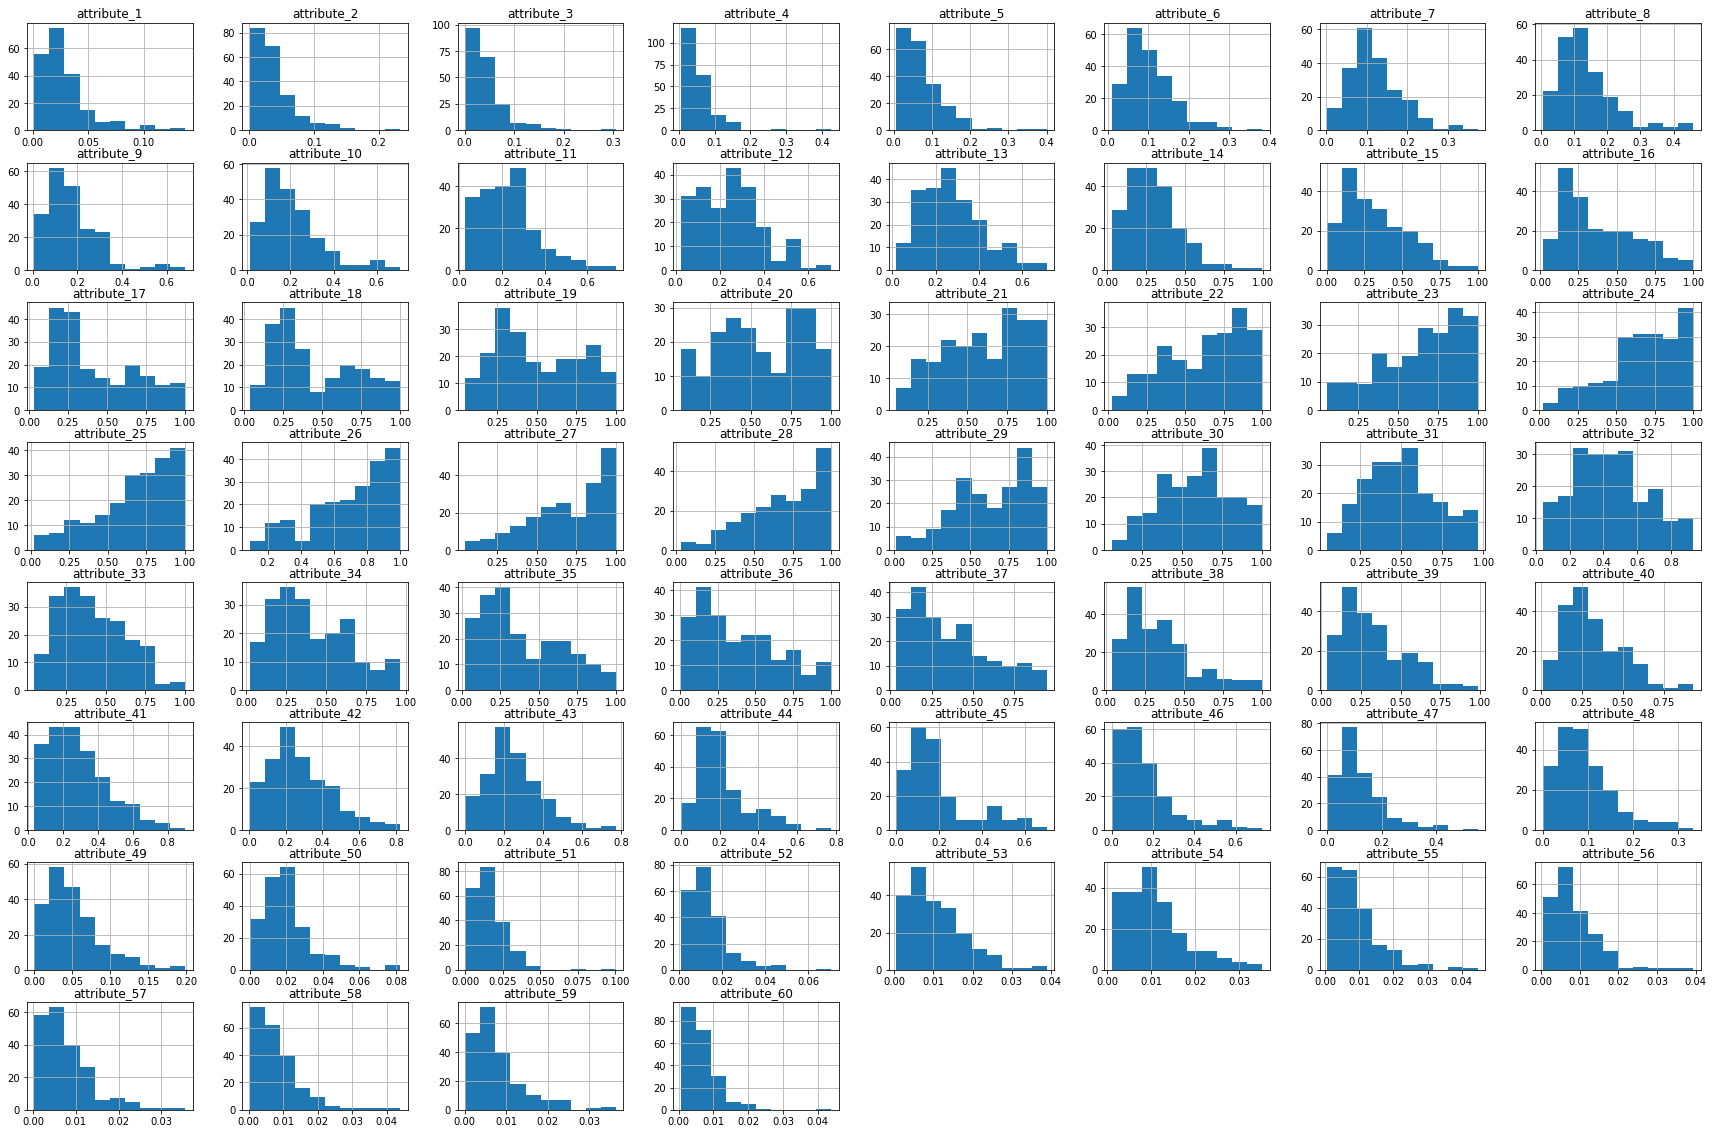

In [6]:
%matplotlib inline

# plots histogram for each numerical attribute by using hist() method

data.hist(figsize=(30,20))
plt.show()

Quick glance at the plots above show that there are no observable categorical columns using float values.
Therefore, no label encoding/one-hot encoding is necessary.

In [7]:
# separate categorical and numerical variables
# num attributes
num = data.columns[data.dtypes != 'object']
# cat attributes
cat = data.columns[data.dtypes == 'object']

# create dataframe that contains only numerical attributes
data_num = data[num]
# create dataframe that contains only categorical attributes
data_cat = data[cat]

In [8]:
# check for missing values in numerical dataframe, sort in descending order to show attributes with highest number of missing values first if there are any.
# if no missing values, then print no missing values
if data_num.isnull().any().sum() != 0:
    print (data_num.isnull().sum().sort_values(ascending=False))
else:
    print ("No numerical attributes with missing values")

No numerical attributes with missing values


In [9]:
# replace data that may contain '?' with np.nan in order to do further checking of missing values
data2 = data.replace('?',np.NaN)

print('Number of instances = %d' % (data2.shape[0]))
print('Number of attributes = %d' % (data2.shape[1]))
print('\n')
# print out list of attributes using a for loop only if there are any attributes with missing values
print('Variables with missing values:')
for col in data2.columns:
    if data2[col].isnull().sum() != 0:
        print('\t%s: %d' % (col,data2[col].isnull().sum()))

Number of instances = 208
Number of attributes = 61


Variables with missing values:


In [10]:
# Check number of unique values for each categorical variable
unique_values_counts = (data_cat.apply(lambda x: x.nunique()).sort_values(ascending=False))
print(unique_values_counts)

Class    2
dtype: int64


# 4. Data Preparation

In [11]:
# print out the unique values/labels of 'Class' attribute
print (data_cat['Class'].value_counts())

Mine    111
Rock     97
Name: Class, dtype: int64


In [12]:
# Extract label and remove from dataframe
y_col_name = 'Class'
y_data = data[y_col_name]
print (y_data.head())

# Perform label encoding for class variable to convert from string to integers

lb_enc = LabelEncoder()
y_data = lb_enc.fit_transform(y_data)
# convert label encoded y into series
y_data = pd.Series(y_data)
print (y_data.head())

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: Class, dtype: object
0    1
1    1
2    1
3    1
4    1
dtype: int32


In [13]:
# use inverse_transform to show original mapping of coded class data
row=97
print('Category Code : ', y_data[row])
print('Category Value: ', lb_enc.inverse_transform(pd.Series(y_data[row])))

Category Code :  0
Category Value:  ['Mine']


In [14]:
# Extract input variables into dataframe by excluding output variable 'Class
x_data = data.drop(y_col_name, axis=1)

In [15]:
# Standard Scale numerial feature data for 60 attributes
# For all the numerical values, transform them to a standard scale of with mean of 0 and standard deviation of 1 using scikit-learn's 'StandardScaler'

# create dataframe containing all numerical attributes
numerical_data = x_data.select_dtypes(include=['float64', 'int64']).copy()
# returns numpy array
data_tmp = numerical_data.values
# Apply standard scaling via fit_transform on numpy array data_tmp
data_tmp = StandardScaler().fit_transform(data_tmp)
# Create dataframe combining scaled data and columns
numerical_data = pd.DataFrame(data_tmp, columns=numerical_data.columns)
# show head of numerical data (after scaling)
numerical_data.head(5)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


In [16]:
# Train test split using scikit learn

# Split up the data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(numerical_data, y_data, test_size=0.3, random_state=42)

print("Train images shape: {}".format(X_train.shape))
print("Train labels shape: {}".format(y_train.shape))
print("Test images shape: {}".format(X_test.shape))
print("Test labels shape: {}".format(y_test.shape))

Train images shape: (145, 60)
Train labels shape: (145,)
Test images shape: (63, 60)
Test labels shape: (63,)


# 5. Creation of base ANN

## 5.1. Define base sequential model

In [17]:
# fix random seed for reproducibility
nr.seed(42)
# Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(42)

# create function for base model (from LU05-A)
def base_model(nodes): # included nodes in the function
    # Define the layers by first initializing the sequential model
    model = models.Sequential()
    # Start base model by building only 2 layers (input and output)
    # Output uses sigmoid activation function because this is binary classification problem
    model.add(layers.Dense(units=nodes, input_shape=(len(x_data.columns),), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # Initialize Adam optimizer (gradient descent) with default values  
    opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model using adam optimization algorithm, 
    # and binary cross-entropy as the default loss function for binary classification problem
    # Accuracy chosen as the metric
    # This compile method necesstitates output layer of ANN to only have single node and a sigmoid function to predict probability for class 1
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Initialize the model with 60 neurons first since there are 60 attributes/features
model_base = base_model(60)

# Print summary of the model
print(model_base.summary())

# Train the model with 20 epochs first
history_base = model_base.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=8)
# Evaluate model with test data
loss, acc = model_base.evaluate(X_test, y_test)
print('\nTest loss: {:.4f}%'.format(loss*100))
print('Test accuracy: {:.4f}%'.format(acc*100))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
15/15 [==============================] - 1s 22ms/step - loss: 0.7810 - accuracy: 0.5086 - val_loss: 0.7970 - val_accuracy: 0.4138
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.5807 - accuracy: 0.6293 - val_loss: 0.6676 - val_accuracy: 0.5862
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4879 - accuracy: 0.7845 - val_loss: 0.6027 - val_accuracy: 0.6552
Epoch 4/20
15/15 [======

## 5.2. Define function for plotting loss over epochs graph

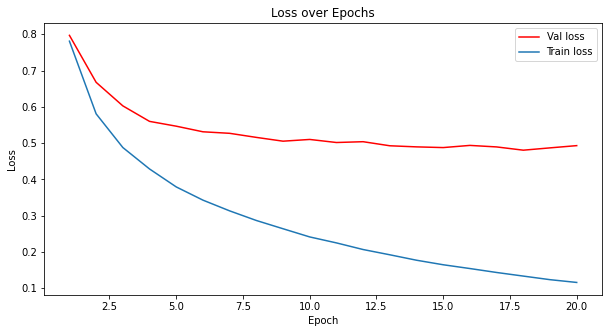

In [18]:
# Plot graph to visualize performance of model

def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = list(range(1, len(val_loss) + 1))
    plt.figure(figsize=(10, 5))
    plt.plot(x, val_loss, color = 'red', label = 'Val loss')
    plt.plot(x, train_loss, label = 'Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    
# Plot graph of base model:
plot_loss(history_base)  

## 5.3. Define function for plotting accuracy over epochs graph

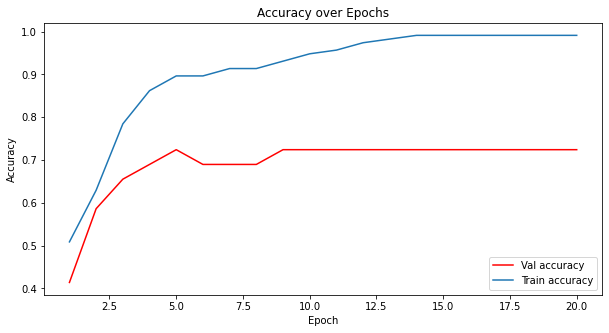

In [19]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.figure(figsize=(10, 5))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

# Plot accuracy graph of base model
plot_accuracy(history_base)

Observations from base model's loss and accuracy graphs:
- Training loss and accuracy continue to improve throughout all 20 epochs. 
- However, the validation loss and accuracy only improve significantly up to around 5th epoch. 
- Although the subsequent epochs show that the training error is low (low bias), the validation error remains high (high variance), suggesting that the base model is simply over-fitting. 
- Looking at the accuracy over epochs graph, training accuracy is high after the 5th epoch (i.e. >90%) but validation accuracy is low at around 70% and remains at that level throughout subsequent epochs. These suggest that the model has high variance, such that there is high variability in the model's prediction for a given data point in telling us the spread of the data.

Hence, we'd need to address the bias-variance tradeoff such that we have a balanced model that has both low bias and low variance. 

From my understanding,
- low bias means that the difference between the average predicted value of the model and the actual value of model is low.
- high variance means that model over-relies on training data, which does not generalize well to data that model has not seen before.

To reduce over-fitting, we need to reduce the model's memory of the training data.
It can be done via the following:
- Get more training data, but it is not feasible in this case
- lower capacity of the model by removing layers/ reduce number of nodes in hidden layers
- apply regularization, which will add a cost to the loss function for large weights
- apply dropout layer to remove certain features/attributes (typically around 0.2)

# 6. Build a new model that neither overfits nor underfits
- Added more dense hidden layers
- Added dropout layers, specifying dropout rate

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

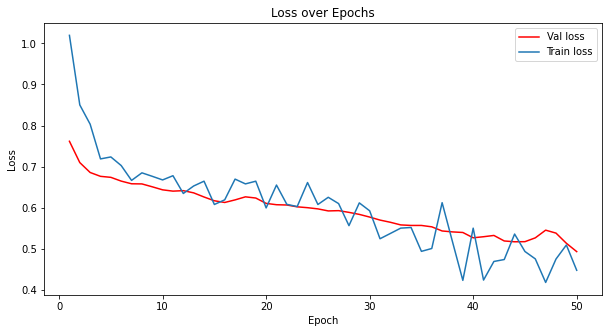

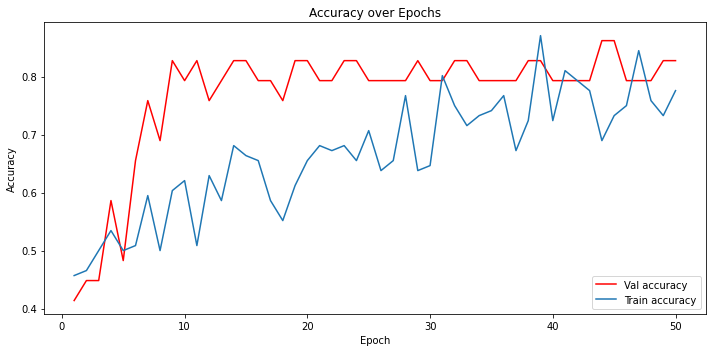

In [20]:
# fix random seed for reproducibility
nr.seed(42)
# Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(42)


# create function for new model
def classifier_model(nodes, dropout_rate): # add dropout_rate in the function
    # ensure dropout rate passed in is less than 1
    assert dropout_rate < 1, 'Incorrect dropout rate specified.'
    # Define the layers by first initializing the sequential model
    model = models.Sequential()
    # Start base model by building only 2 layers (input and output)
    # Output uses sigmoid activation function because this is binary classification problem
    model.add(layers.Dense(units=nodes, input_shape=(len(x_data.columns),), activation='relu'))
    # added 4 more dense layers and 5 more dropout layers to increase complexity of model and prevent over-fitting
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(units=nodes/(2**1), activation='relu'))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(units=nodes/(2**2), activation='relu'))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(units=nodes/(2**3), activation='relu'))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(units=nodes/(2**4), activation='relu'))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    # Initialize Adam optimizer (gradient descent) with default values  
    opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model using adam optimization algorithm, 
    # and binary cross-entropy as the default loss function for binary classification problem
    # Accuracy chosen as the metric
    # This compile method necesstitates output layer of ANN to only have single node and a sigmoid function to predict probability for class 1
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
model1 = classifier_model(60, 0.3)

# Print summary of the model
print(model1.summary())

# Train the model
history1 = model1.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8)
# Evaluate model with test data
loss, acc = model1.evaluate(X_test, y_test)
print('\nTest loss: {:.4f}%'.format(loss*100))
print('Test accuracy: {:.4f}%'.format(acc*100))

# Plots both loss and accuracy graph
plot_loss(history1)
plot_accuracy(history1)
plt.tight_layout()

Observations from the graphs above:
- Looking at the 'Loss over Epochs' graph, both training loss and validation loss decreases at the same rate throughout 50 epochs and there is relatively minimal differences between those 2. Training error remains low (low bias), while validation error is now low too (low variance).
- Looking at the 'Accuracy over Epochs' graph, gap between training accuracy and validation accuracy lines is significantly reduced as compared to the base model. This meant that there is low variability in the model's prediction for a given data point that tells us the spread of the data. With low variance, the model can then generalize well on data it has not seen before. 
- There are also no indication that the model is underfitting as the bias remains low.
- Achieved relatively good validation results (Loss = 37%, Accuracy = 92%), much better than the base model

# 7. Evaluation of classification neural network model built
- After model is determined to be balanced, with no signs of overfitting and underfitting, we evaluate the performance of the model below

(63,)
(63,)
Classification_report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.90      0.93      0.91        28

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Results of Model:
             Model1
accuracy   0.920635
precision  0.896552
recall     0.928571
f1         0.912281
auc        0.921429
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Results of Model: Confusion Matrix
[[32  3]
 [ 2 26]]


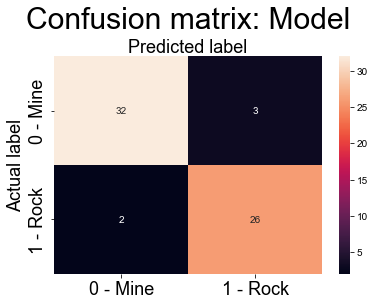

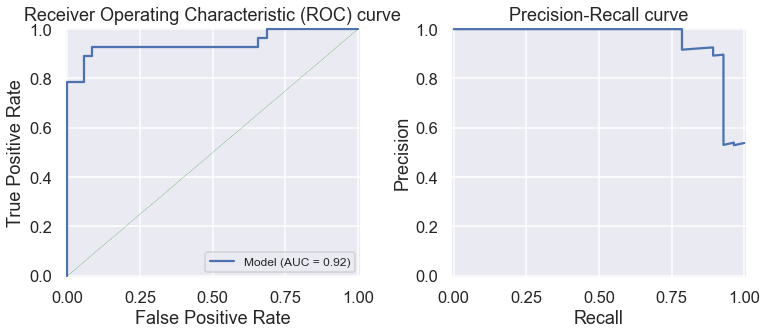

In [21]:
# Evaluate Classification metrics


# Model Prediction (numbers are between 0 and 1 since they are probabilities)
y_pred = np.round(model1.predict(X_test),0).astype(int)[:,0]
y_prob = model1.predict(X_test)[:,0]
print (y_pred.shape)
print (y_prob.shape)

# print out classification report containing precision, recall, f1-scores, and support
cr_lr = classification_report(y_test, y_pred)
print ("Classification_report:")
print(cr_lr)
print ("~"*88)

# Precision, recall, f-score from binary class
precision, recall, fscore, _ = score(y_test, y_pred, average='binary')
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# ROC-AUC scores
auc = roc_auc_score(y_test, y_pred)

results_lr= list()
results_lr.append(pd.Series({'accuracy':accuracy,
                            'precision':precision, 
                            'recall':recall, 
                            'f1':fscore, 
                            'auc':auc}, name='Model1'))
results_lr = pd.concat(results_lr, axis=1, )
print ("Results of Model:")
print (results_lr)
print ("~"*88)

# Show Confusion Matrix

print ("Results of Model: Confusion Matrix")

confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print (confusionmatrix)


# Plot confusion matrix

fig, ax = plt.subplots()
# create heatmap
labels=['0 - Mine', '1 - Rock']
cm_heatmap = sns.heatmap(confusionmatrix, annot=True, fmt='d')
sns.set(font_scale=2.5)
cm_heatmap.set_xticklabels(cm_heatmap.get_xmajorticklabels(), fontsize = 18) 
cm_heatmap.set_yticklabels(cm_heatmap.get_ymajorticklabels(), fontsize = 18) 
cm_heatmap.set_xticklabels(labels)
cm_heatmap.set_yticklabels(labels)
cm_heatmap.xaxis.set_label_position("top")
cm_heatmap.set_title('Confusion matrix: Model', y=1.1)
cm_heatmap.set_ylabel('Actual label', fontsize=18)
cm_heatmap.set_xlabel('Predicted label', fontsize=18)



# Visualise ROC-AUC curve as well as precision-recall curve

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(11, 5)

# Plot the ROC-AUC curve
ax = axList[0]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob)
ax.plot(fpr_lr, tpr_lr, label='Model (AUC = %0.2f)' % roc_auc_score(y_test, y_pred))
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='green', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Receiver Operating Characteristic (ROC) curve',
       )
ax.legend(loc='lower right', fontsize=12)
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob)
ax.plot(recall_lr, precision_lr)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

# show all 3 plots
plt.tight_layout()

In [22]:
# look at the distribution of class in test data
y_test.value_counts(normalize=True)

0    0.555556
1    0.444444
dtype: float64

# Conlusion
- After tweaking the base model with 4 more hidden layers (diminishing number of neurons over each successive dense layer) and 5 drop out layers at 30% dropout rates over a total of 50 epochs, the loss over epochs graph showed no signs that the revised model is over-fitting.
- Multiple fine-tuning procedures were carried out in terms of adding and removing dense layers as well as varying different levels of dropout layers and rates between 20% to 30%. The graphs 'loss over epochs' and 'accuracy over epochs' were examined repeatedly after each adjustment to the model.
- More dense layers were added to increase the complexity of the model so that validation accuracy is increased beyond base model of only around 70%. As model becomes more complex, model is prone to overfitting (where validation error tends to increase/remain high). To combat this overfitting issue, dropout layers were applied after every dense layer and dropout rate of 0.3 has effectively helped model to combat overfitting issues up to the tested number of epochs at 50. 

Once a balanced model has been attained from the tuning procedures conducted (described above), evaluation of the classifier neural network model is carried out on the test dataset (30% of data from scikit learn's traintestsplit method) to examine the performance metrics of the model. 

Interpretations of performance metrics on test data
- From the classification report above, it showed relatively high scores across all metrics. 
- Accuracy = 92% 
    - Ratio of correct predictions to total observations. Given that the test data consists of relatively balanced classes (55.6% negative class, 44.4% positive class), we can establish accuracy score as being one good measure of indicating model performance.
- Precision = 90%
    - Ratio of correctly predicted positive class (true positive) to all predicted positive class. Model is able to correctly predict rocks 90% of the time out of all rocks predictions.
    - Model metric to focus on if costs of false positive is high (bad consequences if actual negative is predicted as positive)
- Recall = 93%
    - Sensitivity measure, ratio of correctly predicted positive class to all true positive and negative classes.
    - The model metric to focus on if there is a high cost with false negative (bad consequences if actual positive is predicted as negative) 
- F1-score = 0.91
    - Weighted average of precision and recall values which takes both false positive and false negative into account. More useful than accuracy measure if class distribution is uneven.
- ROC-AUC = 0.92
    - Interpreted as having 92% chance of correctly distinguishing between rocks (positive class) and mines (negative class)
    - There is a 92% chance that the model will correctly distinguish a rock from a mine based on the data.